In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uproot

In [16]:
file_path="ROOT/RUN105_ch0.root"


file = uproot.open(file_path)
file.keys()
tree = file["IR02;1"] 

tree.show()
evts=tree["ADC"].array().to_numpy();



name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
ADC                  | std::vector<int16_t>     | AsJagged(AsDtype('>i2'), he...
EventNumber          | int32_t                  | AsDtype('>i4')
TriggerTimeStamp     | uint64_t                 | AsDtype('>u8')
PCTimeStamp          | uint64_t                 | AsDtype('>u8')


34 9


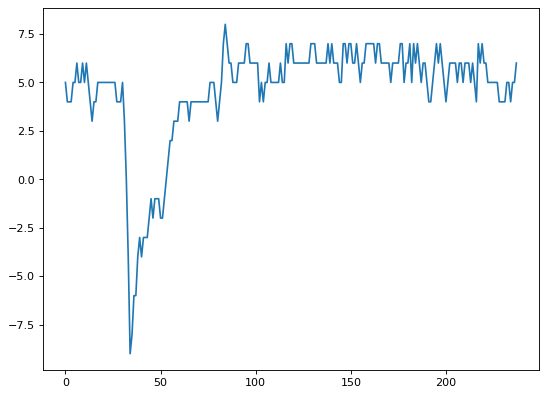

In [131]:
sample=evts[4];
plt.figure(figsize=(8, 6), dpi=80);
plt.plot(evts[4])
a=np.argmax(-sample)
b=np.max(-sample)
print(a,b)

z=0;

Amp = []
T   = []
Ped = []
Q   = []

for i in evts:
    a   = np.argmax(-i)
    b   = np.max(-i)
    ped = np.mean(-i[0:30])
    wvf = -(i+ped)
    q   = np.mean(wvf[30:72])
    T.append(a)
    Amp.append(b)
    Ped.append(ped)
    Q.append(q)

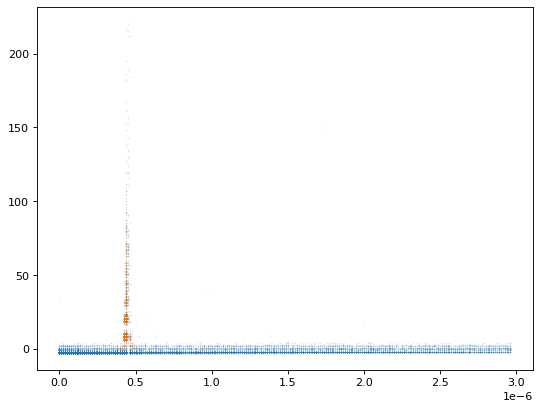

In [145]:
Amp=np.array(Amp)

T2=np.array(T)*12.5*1e-9
# plt.plot(T2,Amp,marker='.',markersize=.1,linestyle="")

cut1=(T2>0.4e-6) & (T2<0.5e-6)
cut2=Amp>0

cuts=cut1*cut2

plt.figure(figsize=(8, 6), dpi=80);

plt.plot(T2,Amp,marker='.',markersize=.1,linestyle="")

plt.plot(T2[cuts],Amp[cuts],marker='.',markersize=.1,linestyle="")
# plt.hist(Amp[cut1*cut2],200);
# plt.semilogy()

Expected number of arriving photons

$P_{n} = \frac{{{\left\vert \alpha \right\vert}^{2n}}}{n!} e^{{-\left\vert \alpha \right\vert}^2} = \frac{{\langle n \rangle}^{n}}{n!} e^{-\langle n \rangle}\quad n=1,2,3...$

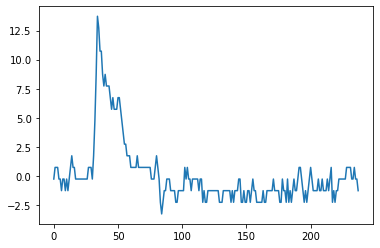

In [141]:
plt.plot(-(evts[4]+Ped[4]))

(0.0, 40.0)

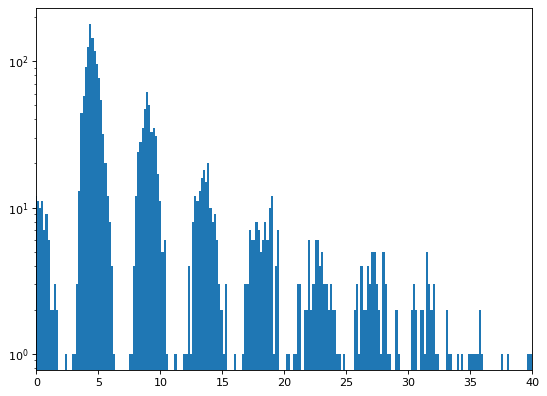

In [144]:
plt.figure(figsize=(8, 6), dpi=80);

plt.hist(np.array(Q)[cuts],500);

plt.semilogy()
plt.xlim([0,40])

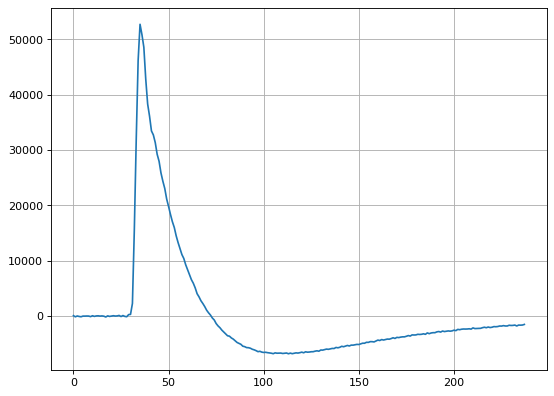

In [128]:
avw=np.zeros(len(sample))
for i in range(len(evts)):
    if cuts[i]:
        wvf=-(evts[i]+Ped[i])
        avw+=wvf

plt.figure(figsize=(8, 6), dpi=80);

plt.plot(avw)
plt.grid()